<a href="https://colab.research.google.com/github/esrayuzgec/AlzheimerDetection/blob/main/AlzheimerData2.2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install kaggle

In [3]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"esrayuzgec","key":"38d38662eddc4827ce5088ed6044748a"}'}

In [4]:
!mkdir –p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600  ~/.kaggle/kaggle.json

In [5]:
!kaggle datasets download -d basheersaeed/alzheimers-brain-mri

 99% 731M/738M [00:09<00:00, 104MB/s] 
100% 738M/738M [00:09<00:00, 83.7MB/s]


In [6]:
from zipfile import ZipFile
file_name="alzheimers-brain-mri.zip"

In [7]:
with ZipFile(file_name,'r') as zip:  #Zip halinde gelenn dosyayı  açtık
  zip.extractall()
  print('done')

done


In [8]:
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

     |████████████████████████████████| 727kB 8.6MB/s 
     |████████████████████████████████| 51kB 7.1MB/s 
     |████████████████████████████████| 1.2MB 17.4MB/s 
     |████████████████████████████████| 194kB 48.8MB/s 
     |████████████████████████████████| 61kB 8.3MB/s 
     |████████████████████████████████| 51kB 7.7MB/s 
     |████████████████████████████████| 12.8MB 251kB/s 
     |████████████████████████████████| 776.8MB 22kB/s 
ERROR: torchtext 0.9.1 has requirement torch==1.8.1, but you'll have torch 1.7.1 which is incompatible.
Mounted at /content/gdrive


In [11]:
from fastai.vision.all import *

In [13]:
path=Path("/content/MRI/Training")
path.ls()

(#3) [Path('/content/MRI/Training/.ipynb_checkpoints'),Path('/content/MRI/Training/AD'),Path('/content/MRI/Training/CN')]

In [15]:
item_tfms = Resize(256)
batch_tfms = aug_transforms=[Normalize.from_stats(*imagenet_stats)]

In [16]:
brain = DataBlock(blocks=(ImageBlock,CategoryBlock),
                  get_items= get_image_files,
                  get_y = parent_label,
                  splitter =RandomSplitter(valid_pct= 0.1),
                  item_tfms = item_tfms,
                  batch_tfms = batch_tfms
                  )

In [17]:
dls = brain.dataloaders(path,bs=32)

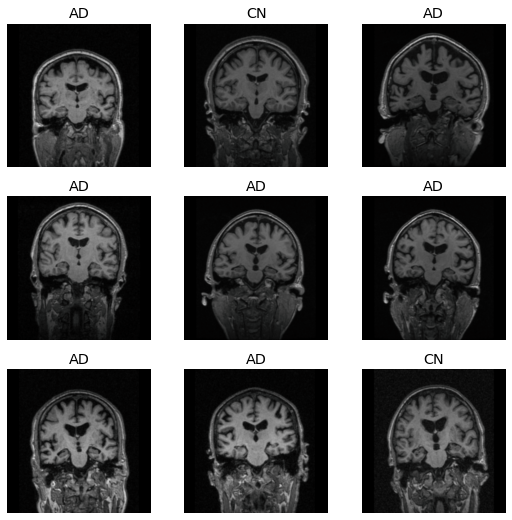

In [18]:
dls.show_batch(max_n=9,unique=False)

In [19]:
learn= cnn_learner(dls,vgg16_bn, pretrained=True, metrics=[accuracy,error_rate])

Downloading: "https://download.pytorch.org/models/vgg16_bn-6c64b313.pth" to /root/.cache/torch/hub/checkpoints/vgg16_bn-6c64b313.pth


SuggestedLRs(lr_min=0.002754228748381138, lr_steep=0.0063095735386013985)

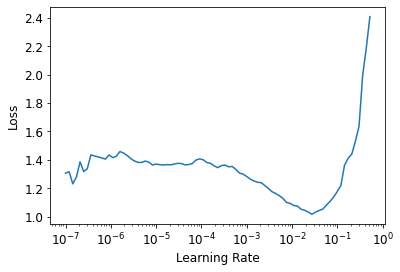

In [20]:
learn.lr_find()

In [21]:
learn.fine_tune(25,1.2e-3)

epoch,train_loss,valid_loss,accuracy,error_rate,time
0,1.326376,0.845771,0.475000,0.525000,00:31


epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.829161,0.693676,0.625000,0.375000,00:33
1,0.739777,0.590891,0.750000,0.250000,00:32
2,0.612906,0.627392,0.725000,0.275000,00:32
3,0.475441,0.737846,0.700000,0.300000,00:33
4,0.379749,0.699437,0.750000,0.250000,00:32
5,0.308946,0.849679,0.750000,0.250000,00:33
6,0.248092,0.929850,0.750000,0.250000,00:32
7,0.200933,0.789988,0.775000,0.225000,00:33
8,0.161466,0.754942,0.750000,0.250000,00:32
9,0.130461,0.763615,0.725000,0.275000,00:32


In [25]:
learn.unfreeze()

In [26]:
learn.fine_tune(10)

epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.026445,0.586971,0.800000,0.200000,00:31


epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.009813,0.618845,0.775000,0.225000,00:33
1,0.014952,0.824319,0.825000,0.175000,00:32
2,0.040818,1.455841,0.750000,0.250000,00:32
3,0.078568,1.260535,0.750000,0.250000,00:32
4,0.111068,1.209183,0.850000,0.150000,00:33
5,0.118547,1.200429,0.775000,0.225000,00:32
6,0.106008,1.000377,0.775000,0.225000,00:33
7,0.097999,0.854280,0.800000,0.200000,00:32
8,0.076898,0.873492,0.825000,0.175000,00:33
9,0.069301,0.873019,0.825000,0.175000,00:33


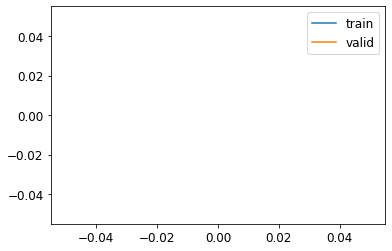

In [30]:
learn.recorder.plot_loss()

In [31]:
interp=ClassificationInterpretation.from_learner(learn)

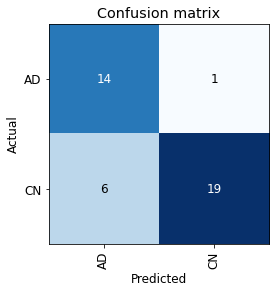

In [33]:
interp.plot_confusion_matrix()

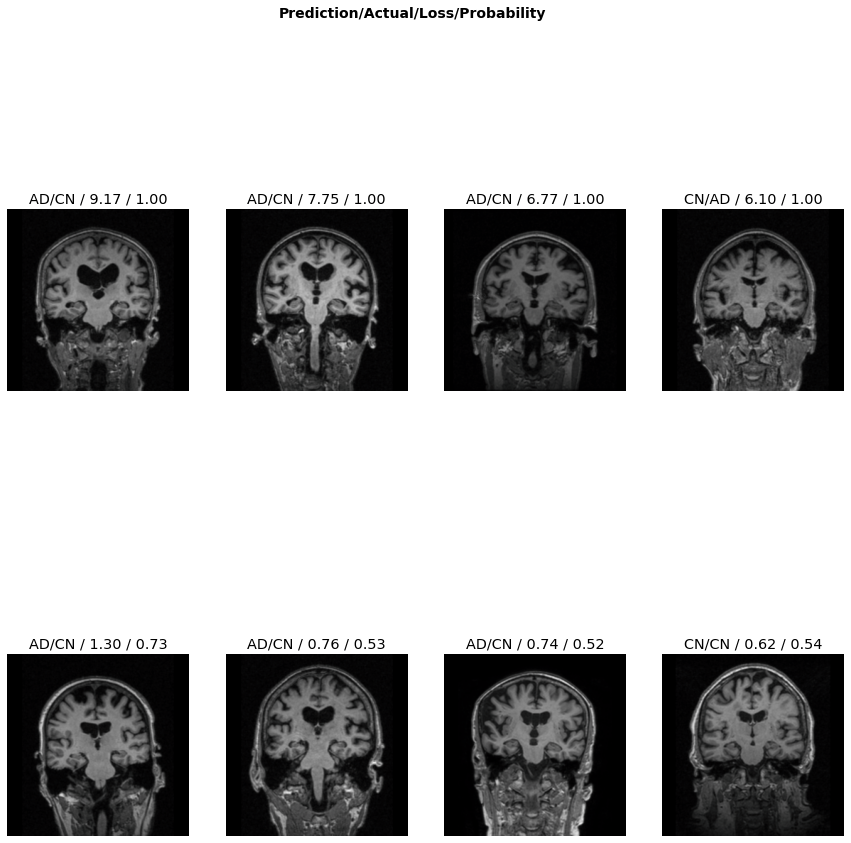

In [34]:
interp.plot_top_losses(8, figsize=(15,15))